# Bank Customer Churn Modelling

**Objective:** Identifying customer churn in banks will helps the management to classification who are likely to churn early and target customers using promotions, as well as provide insight into which factors should be considered when retaining customers.

**Data Source**: Data is taken from the YBI-Foundation repository from github.com

## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

## Import Data

In [2]:
df=pd.read_csv("Bank Churn Modelling.csv")

## Describe Data

In [3]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [5]:
df.isnull().sum()

CustomerId          0
Surname             0
CreditScore         0
Geography           0
Gender              0
Age                 0
Tenure              0
Balance             0
Num Of Products     0
Has Credit Card     0
Is Active Member    0
Estimated Salary    0
Churn               0
dtype: int64

In [6]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Data Visualization

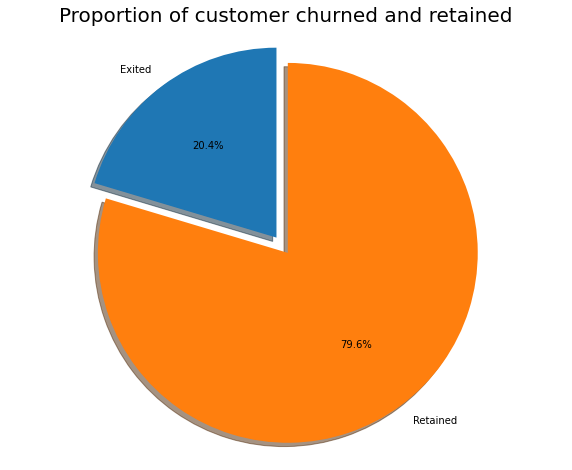

In [7]:
labels = 'Exited', 'Retained'
sizes = [df.Churn[df['Churn']==1].count(), df.Churn[df['Churn']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

<AxesSubplot:>

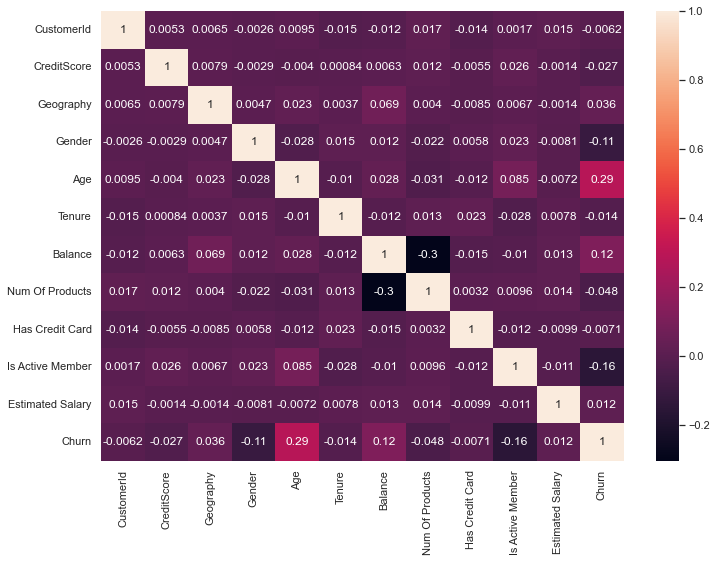

In [8]:
# We need to do encoding to visualize the data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.Geography=le.fit_transform(df.Geography)
df.Gender=le.fit_transform(df.Gender)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(df.corr(),annot=True)

In [9]:
df=df[['CreditScore','Geography','Gender','Age','Balance','Is Active Member','Estimated Salary','Churn']]
#sns.pairplot(data=df,hue='Churn')
df

,CreditScore,Geography,Gender,Age,Balance,Is Active Member,Estimated Salary,Churn
0,619,0,0,42,0.00,1,101348.88,1
1,608,2,0,41,83807.86,1,112542.58,0
2,502,0,0,42,159660.80,0,113931.57,1
3,699,0,0,39,0.00,0,93826.63,0
4,850,2,0,43,125510.82,1,79084.10,0
...,...,...,...,...,...,...,...,...
9995,771,0,1,39,0.00,0,96270.64,0
9996,516,0,1,35,57369.61,1,101699.77,0
9997,709,0,0,36,0.00,1,42085.58,1
9998,772,1,1,42,75075.31,0,92888.52,1


<AxesSubplot:xlabel='Balance', ylabel='Count'>

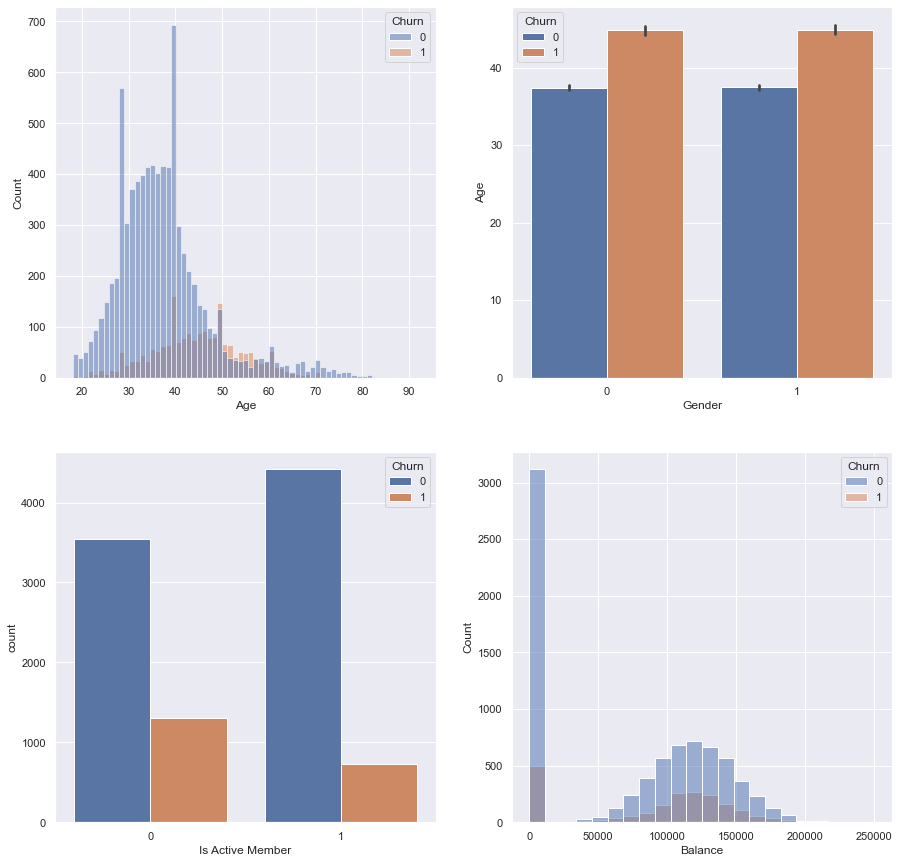

In [10]:
fig,ax=plt.subplots(2,2,figsize=(15,15))
sns.histplot(ax=ax[0,0],data=df,x='Age',hue='Churn')
sns.barplot(ax=ax[0,1],data=df,x='Gender',y='Age',hue='Churn')
sns.countplot(ax=ax[1,0],data=df,x='Is Active Member',hue='Churn')
sns.histplot(ax=ax[1,1],data=df,x='Balance',hue='Churn')

## Define Target variable (y) and Feature Variables (X)

In [11]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
print(X)
print(y)

[[6.1900000e+02 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 1.0134888e+05]
 [6.0800000e+02 2.0000000e+00 0.0000000e+00 ... 8.3807860e+04
  1.0000000e+00 1.1254258e+05]
 [5.0200000e+02 0.0000000e+00 0.0000000e+00 ... 1.5966080e+05
  0.0000000e+00 1.1393157e+05]
 ...
 [7.0900000e+02 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 4.2085580e+04]
 [7.7200000e+02 1.0000000e+00 1.0000000e+00 ... 7.5075310e+04
  0.0000000e+00 9.2888520e+04]
 [7.9200000e+02 0.0000000e+00 0.0000000e+00 ... 1.3014279e+05
  0.0000000e+00 3.8190780e+04]]
[1 0 1 ... 1 1 0]


## Data Standardization

In [12]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X=ss.fit_transform(X)
# X[:,2:3]=ss.fit_transform(X[:,2:3])

## Train Test Split

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

## Modeling

In [14]:
# from sklearn.tree import DecisionTreeClassifier
# classifier=DecisionTreeClassifier(criterion='entropy')

# from sklearn.neighbors import KNeighborsClassifier  
# classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  

# from sklearn.linear_model import LogisticRegression
# classifier=LogisticRegression()

# from sklearn.svm import SVC
# classifier=SVC(kernel="rbf",random_state=0)

from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(criterion='gini',max_depth=10)

classifier.fit(X_train,y_train)


RandomForestClassifier(max_depth=10)

## Model Prediction

In [15]:
y_pred=classifier.predict(X_test)

## Model Evaluation

In [16]:
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: ',accuracy)

Accuracy:  0.84


In [17]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91      1595
           1       0.72      0.34      0.46       405

    accuracy                           0.84      2000
   macro avg       0.79      0.65      0.69      2000
weighted avg       0.83      0.84      0.82      2000



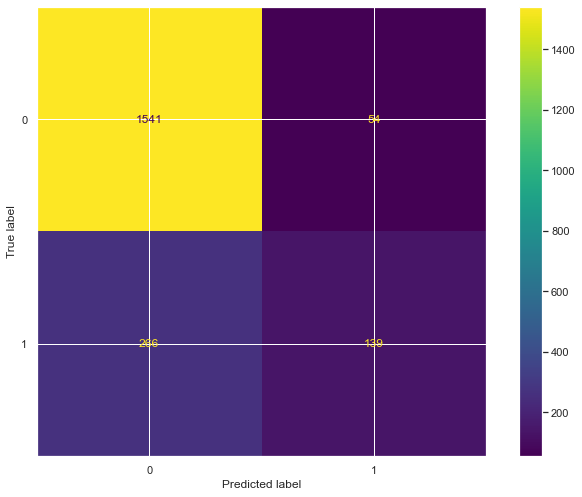

In [18]:
cm=metrics.confusion_matrix(y_test,y_pred)
metrics.ConfusionMatrixDisplay(cm, display_labels=classifier.classes_).plot()

## Explanation

Hence, we can conclude that we have developed the bank customer churning model using RandomForestClassifier and state that based on the features with high correlation, we are able to predict whether a consumer will churn or not thus saving time of bank in that prediction